# Profitable App Profiles for the App Store and Google Play Markets

This project is a part of Dataquest's Data Scientist in Python track. As data analysts, we are tasked to find out what kind of mobile apps that will attract the most users. Remember that we aim to find a popular free app designed for English-speaking users.

In order to do that, we need to analyze the characteristics of most popular apps currently available on the marketplace. According to Statista, as of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

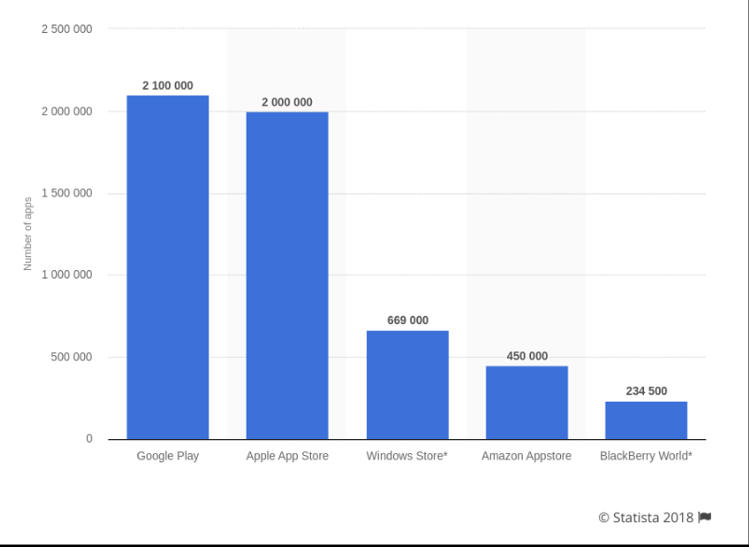

Here, we have two datasets, one contains apps from Google Play and the other is from App Store.

- [A data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
- [A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

Let's start by opening the two data sets and then continue with exploring the data.

In [1]:
# Import necessary libraries
from csv import reader

In [2]:
# Open and read the CSV for Apple Store
opened_file = open('AppleStore.csv', encoding="utf8")
read_file = reader(opened_file)
apple_store = list(read_file) # We are storing the data as lists
apple_store_header = apple_store[0]
apple_store = apple_store[1:] # We divide the header and the rest of the data

# Open and read the CSV file for Google Play
opened_file = open('googleplaystore.csv', encoding="utf8")
read_file = reader(opened_file)
google_play = list(read_file)
google_play_header = google_play[0]
google_play = google_play[1:]

In [3]:
# Let's print the name of the columns of Apple Store dataset
apple_store_header

['id',
 'track_name',
 'size_bytes',
 'currency',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'ver',
 'cont_rating',
 'prime_genre',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic']

In [4]:
# Let's print the name of the columns of Google Play dataset
google_play_header

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [45]:
# We are going to create a function that can repeatedly use to print rows
def explore_data(dataset, start, end):
    dataset_slice = dataset[start:end]
    for row in dataset_slice: # looping through the slice
        print(row)
        print('\n') # adds a new (empty) line after each row

In [6]:
# Let's print out the first few rows of each dataset
explore_data(apple_store, 0, 3)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']




In [7]:
explore_data(google_play, 0, 3)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']




In [8]:
# Number of rows and columns of each dataset
print('Apple dataset rows and columns: {0} and {1}'.format(len(apple_store), len(apple_store_header)))
print('Google dataset rows and columns: {0} and {1}'.format(len(google_play), len(google_play_header)))

Apple dataset rows and columns: 7197 and 16
Google dataset rows and columns: 10841 and 13


Remember that our goal is to identify what kind of apps that are likely to attract more users, based on existing apps on Google Play and the App Store. Thus, free apps that have high number of user ratings or installs should be our focus.

Yet, we need to identify and delete inaccurate data as well as detecting and removing duplicate data. As we are looking for apps that are free and English-only apps, we will delete those that are not free and non-English.

## Deleting the Wrong Entry

After examining [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) on Kaggle, we note that people were talking about the wrong row number 10,472 on the Google Play dataset. Let us see the row in question:

In [9]:
# Examine row 10,472
print(google_play_header)
print('\n')
print(google_play[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


Okay, the category column is 1.9, which is incorrect. The `Category` column is meant to clasify what kind of app it is. For instance, it is a gaming app or a productivity app. Given that the row has an error, it is probably the best if we drop the row.

In [10]:
# using the del statement to remove the incorrect row
del google_play[10472]

## Removing Duplicate Entries

### Part One

Next, we are going to remove duplicated apps. For instance, Instagram has four duplicates.

In [11]:
# Checking if Instagram app has duplicate entries on the Google Play
for app in google_play:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In [12]:
# Calculating the number of duplicated entries
duplicate_apps = []
unique_apps = []

for app in google_play:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name) # If name already in unique_apps, append it to duplicate_apps
    else:
        unique_apps.append(name) # If new, append name to unique_apps

In [13]:
# Checking Google Play apps that have more than 1
print('The number of duplicated apps is {}'.format(len(duplicate_apps)))
print('The number of unique apps is {}'.format(len(unique_apps)))

The number of duplicated apps is 1181
The number of unique apps is 9659


In this case, there should be 9,659 unique apps on Google Play. Instead, we have 10,840 (the row 10,472 has been removed) due to duplicates.

 Why is that? From the results above, we can see that the sole difference is in the `Reviews` column. This is likely because the data was collected at different times. Hence, it is reasonable if we use the highest number of reviews, since the data should be the latest one. Let's check the examples of duplicated apps.

In [14]:
# Example of duplicated apps
print("Examples of duplicated apps: {}".format(duplicate_apps[:15]))

Examples of duplicated apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


We are not going to delete duplicated apps randomly. As mentioned before, we are going to retain those that have the highest number of review, because we want to keep the latest ones, and remove the remaining ones.

### Part Two

Let's keep the apps that have the highest number of `Reviews`, since it will be the latest data.

In [15]:
# Keeping apps that have the higher number of reviews in a dictionary
reviews_max = {}

for app in google_play:
    name = app[0]
    n_reviews = float(app[3])
    if (name in reviews_max) and (reviews_max[name] < n_reviews): # If the name of the app is already in reviews_max and the number of reviews is less than the new value
        reviews_max[name] = n_reviews # replace with the highest value
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In [16]:
print('Expected_length:', len(google_play) - 1181) # 1,181 is the number of duplicated apps
print('Actual_length:', len(reviews_max))

Expected_length: 9659
Actual_length: 9659


After confirming that the number of non-duplicated apps is 9,659, we are going to separate the already cleaned data, which does not contain duplicated apps, from the original data.

In [17]:
# Separate cleaned Google Play data
android_clean = [] # For new cleaned dataset
already_added = [] # Only for app names

for app in google_play:
    name = app[0]
    n_reviews = float(app[3])
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

In [18]:
# The number of data in the cleaned dataset
len(android_clean)

9659

## Removing Non-English Apps: Part One

After we cleaned the Google Play dataset, we are now removing non-English apps, since we looking to develop an app for English-speaking users. Each character is assigned with a number according to the ASCII standard. For an English text, the number is between 0 and 127, inclusive. 

Therefore, we are going to check whether each of the character in an app name has an ASCII number between 0 and 127. If not, then such app is not designed for an English-speaking audience in the first place. Remember that our app names are stored as strings, and strings are iterable, which is available for indexing and looping.

In [19]:
# Create a function to check whether the app has an ASCII number more than 127
def check_characters(string):
    for s in string:
        if ord(s) > 127:
            return False
    return True

In [20]:
# Check whether the function is working correctly or not
print(check_characters('Instagram'))
print(check_characters('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_characters('Docs To Go™ Free Office Suite'))
print(check_characters('Instachat 😜'))

True
False
False
False


But apps that have symbols like 😜 are at risk of incorrectly being removed, since emojis and characters fall outside the ASCII range and has numbers over 127. Therefore, to minimize the risk of incorrectly removing apps, we will only remove an app if its name has more than three characters falling outside the ASCII range. 

In [21]:
# Example of an emoji falling outside the ASCII range
print(ord("😜"))

128540


In [22]:
# Revise the function so that it will only remove apps that have more than three characters outside ASCII range
def check_characters_revised(string):
    non_ascii = 0 # As a counter if non_ascii characters are more than 3
    
    for s in string:
        if ord(s) > 127:
            non_ascii += 1
            
    if non_ascii > 3:
        return False
    else:
        return True

In [23]:
print(check_characters_revised('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_characters_revised('Docs To Go™ Free Office Suite'))
print(check_characters_revised('Instachat 😜'))

False
True
True


In [24]:
# Separate English and non-English apps
google_play_english = []
apple_store_english = []

# Looping through the Google Play apps
for app in android_clean:
    name = app[0]
    if check_characters_revised(name):
        google_play_english.append(app)
        
# Looping through the Apple Store apps
for app in apple_store:
    name = app[1]
    if check_characters_revised(name):
        apple_store_english.append(app)

In [25]:
# Checking the number of apps
print('The number of English apps on Google Play is {}'.format(len(google_play_english)))
print('The number of English apps on Apple Store is {}'.format(len(apple_store_english)))

The number of English apps on Google Play is 9614
The number of English apps on Apple Store is 6183


## Isolating the Free Apps

So far, we have removed inaccurate data, removed duplicate app entries, and removed non-English apps. Next step is to differentiate between free apps and paid apps. This is because our main source of revenue would be in-app ads.

In [26]:
google_free_apps = []
apple_free_apps = []

for app in google_play_english:
    price = app[7]
    if price == '0':
        google_free_apps.append(app)
        
for app in apple_store_english:
    price = app[4]
    if price == '0.0':
        apple_free_apps.append(app)
        
print('The number of free apps on Google Play is {}'.format(len(google_free_apps)))
print('The number of free apps on Apple Store is {}'.format(len(apple_free_apps)))

The number of free apps on Google Play is 8864
The number of free apps on Apple Store is 3222


## Most Common Apps by Genre: Part One

As things stand, we have done the following:
1. Removing inaccurate data
2. Removing duplicate app entries
3. Removing non-English apps
4. Isolating the free apps

Please note that our end goal is to find an app that will be succesful on Google Play and App Store. Hence, we need to find the characteristics of such app. We are going to find the most common genres for each market. First, let's create a frequency table. Second, we will sort that frequency table in a descending order.

## Most Common Apps by Genre: Part Two

In [27]:
# Design a function that creates a frequency table
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
            
    table_percentage = {}
    
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentage[key] = percentage
        
    return table_percentage

In [28]:
# Create a frequency table determine the most common genre
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0]) # Printing the key and the value associated with that key

## Most Common Apps by Genre: Part Three

Let's further analyze the frequency tables.
1. What is the common genre? What is the next most common?
2. What other patterns do you see?
3. What is the general impression? Are most of the apps designed for practical purposes (education, shopping, utilities, productivity, lifestyle) or more for entertainment (games, photo and video, social networking, sports, and music)?
4. Can you recommend an app profile for the App Store market based on this frequency table alone? If there is a large number of apps for a particular genre, does that also imply that apps of that genre generally have a larger number of users?

In [29]:
# Generate a Prime Genre frequency table for App Store
display_table(apple_free_apps, 11) # index number 11 refers to prime_genre column

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


The most common genre for `prime_genre`column was Games (58%) and Entertainment (7.9%). It seems that the most popular ones are recretional apps, not those with practical purposes. Apps with entertainment purposes dominate the frequency table. Does this mean that those apps have a large number of users? Not necessarily. Our guess is that those app makers probably develop gaming apps because there are a lot of demand, hence more gaming apps. But we can't make any definitive conclusion as of now. Let's continue on the Google Play ones with `Category` and `Genre` columns.

In [30]:
# Category frequency table for Category on Google Play
display_table(google_free_apps, 1) # Index number 1 is Category column

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

In [31]:
# Generate a Genre frequency table for Google Play
display_table(google_free_apps, -4) # Index number -4, or 10, is the Genre column

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

Now, these frequency tables suggest that the number of those apps is more evenly distributed. From both `Category` and `Genre` columns, the highest percentage comes from Tools and Family categories, followed by Game and Entertainment.

We couldn't find the Family category on Google Play. This might be because the dataset is outdated, as seen in the Kaggle download page where the dataset was uploaded more than 5 years ago. Meanwhile, Google appears to have rearranged the category. But for learning purposes, we will still continue on the Tools app.

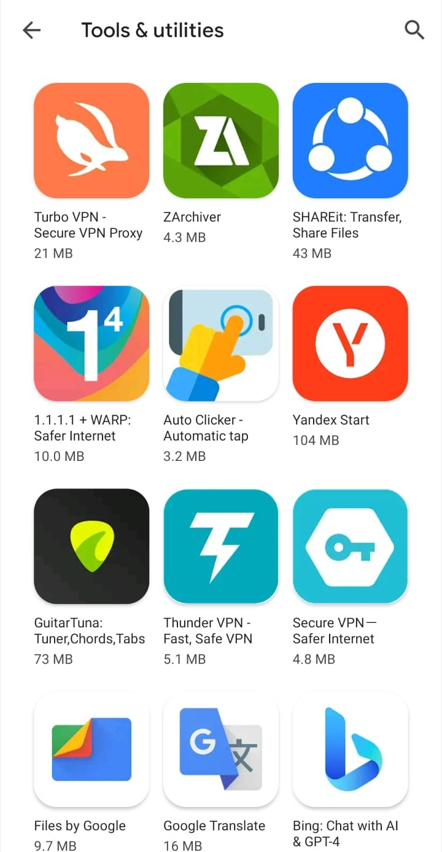

So, apps on Tools category generally revolve around productivity apps, such as, for example, Google Translate or VPN. But combining what we learned from the `prime_genre` column on Apple Store, we can see that the most popular apps are related to gaming and entertainment.

## Most Popular Apps by Genre on the App Store

As mentioned before, numerous gaming or entertainment-related apps might suggest that there are a lot of demand, but we can't say for sure if that is the case. But we can address such issue by calculating the number of installs for each app genre. We can find this information in the `Installs` column for Google Play, but this is missing on the Apple Store dataset. But we can use the total number of user ratings as a proxy in the `rating_count_tot` app.

In [32]:
# Create a frequency table for Apple Store
apple_freq_table = freq_table(apple_free_apps, -5)
print(apple_freq_table)

{'Social Networking': 3.2898820608317814, 'Photo & Video': 4.9658597144630665, 'Games': 58.16263190564867, 'Music': 2.0484171322160147, 'Reference': 0.5586592178770949, 'Health & Fitness': 2.0173805090006205, 'Weather': 0.8690254500310366, 'Utilities': 2.5139664804469275, 'Travel': 1.2414649286157666, 'Shopping': 2.60707635009311, 'News': 1.3345747982619491, 'Navigation': 0.186219739292365, 'Lifestyle': 1.5828677839851024, 'Entertainment': 7.883302296710118, 'Food & Drink': 0.8069522036002483, 'Sports': 2.1415270018621975, 'Book': 0.4345127250155183, 'Finance': 1.1173184357541899, 'Education': 3.662321539416512, 'Productivity': 1.7380509000620732, 'Business': 0.5276225946617008, 'Catalogs': 0.12414649286157665, 'Medical': 0.186219739292365}


Now, we are going to calculate the average rating per app by summing the number of rating (not the score, but the number of it) divided by the number of apps in that particular genre.

In [33]:
for genre in apple_freq_table: # For every genre...
    total = 0 # Store the sum of user ratings
    len_genre = 0 # Store the number of apps by genre
    
    for app in apple_free_apps:
        genre_app = app[-5] # Prime_genre column
        if genre_app == genre:
            n_ratings = float(app[5]) # Rating_count_tot column
            total += n_ratings
            len_genre += 1
    
    average_number_of_user_ratings = total / len_genre
    print('{}: {}'.format(genre, average_number_of_user_ratings))

Social Networking: 71548.34905660378
Photo & Video: 28441.54375
Games: 22788.6696905016
Music: 57326.530303030304
Reference: 74942.11111111111
Health & Fitness: 23298.015384615384
Weather: 52279.892857142855
Utilities: 18684.456790123455
Travel: 28243.8
Shopping: 26919.690476190477
News: 21248.023255813954
Navigation: 86090.33333333333
Lifestyle: 16485.764705882353
Entertainment: 14029.830708661417
Food & Drink: 33333.92307692308
Sports: 23008.898550724636
Book: 39758.5
Finance: 31467.944444444445
Education: 7003.983050847458
Productivity: 21028.410714285714
Business: 7491.117647058823
Catalogs: 4004.0
Medical: 612.0


From the results above, we can see that the Navigation genre is the most popular one based on the number of ratings. But connecting with the results on the number of apps, we note that social networking apps only comprised about 0.2% of total apps on Apple Store. This means that only a few of Navigation apps have massive ratings, which skewed our results. This makes sense because apps like Google Maps or Waze will have a huge amount of users.

Let's confirm it, and if that is the case, let us examine the next two genres based on the highest average user ratings. We will skip the Social Networking ones because Facebook and Instagram should also have skewed the results.

In [34]:
for app in apple_free_apps:
    app_name = app[1]
    genre_app = app[-5]
    n_ratings = float(app[5])
    if genre_app == 'Navigation':
        print('{}:{}'.format(app_name, n_ratings))

Waze - GPS Navigation, Maps & Real-time Traffic:345046.0
Google Maps - Navigation & Transit:154911.0
Geocaching®:12811.0
CoPilot GPS – Car Navigation & Offline Maps:3582.0
ImmobilienScout24: Real Estate Search in Germany:187.0
Railway Route Search:5.0


This confirms of initial hypothesis that Waze and Google Maps skewed the results. Let's try analyzing Reference and Music.

In [35]:
for app in apple_free_apps:
    app_name = app[1]
    genre_app = app[-5]
    n_ratings = float(app[5])
    if genre_app == 'Reference':
        print('{}:{}'.format(app_name, n_ratings))

Bible:985920.0
Dictionary.com Dictionary & Thesaurus:200047.0
Dictionary.com Dictionary & Thesaurus for iPad:54175.0
Google Translate:26786.0
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran:18418.0
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition:17588.0
Merriam-Webster Dictionary:16849.0
Night Sky:12122.0
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE):8535.0
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools:4693.0
GUNS MODS for Minecraft PC Edition - Mods Tools:1497.0
Guides for Pokémon GO - Pokemon GO News and Cheats:826.0
WWDC:762.0
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free:718.0
VPN Express:14.0
Real Bike Traffic Rider Virtual Reality Glasses:8.0
教えて!goo:0.0
Jishokun-Japanese English Dictionary & Translator:0.0


In [36]:
for app in apple_free_apps:
    app_name = app[1]
    genre_app = app[-5]
    n_ratings = float(app[5])
    if genre_app == 'Music':
        print('{}:{}'.format(app_name, n_ratings))

Pandora - Music & Radio:1126879.0
Spotify Music:878563.0
Shazam - Discover music, artists, videos & lyrics:402925.0
iHeartRadio – Free Music & Radio Stations:293228.0
SoundCloud - Music & Audio:135744.0
Magic Piano by Smule:131695.0
Smule Sing!:119316.0
TuneIn Radio - MLB NBA Audiobooks Podcasts Music:110420.0
Amazon Music:106235.0
SoundHound Song Search & Music Player:82602.0
Sonos Controller:48905.0
Bandsintown Concerts:30845.0
Karaoke - Sing Karaoke, Unlimited Songs!:28606.0
My Mixtapez Music:26286.0
Sing Karaoke Songs Unlimited with StarMaker:26227.0
Ringtones for iPhone & Ringtone Maker:25403.0
Musi - Unlimited Music For YouTube:25193.0
AutoRap by Smule:18202.0
Spinrilla - Mixtapes For Free:15053.0
Napster - Top Music & Radio:14268.0
edjing Mix:DJ turntable to remix and scratch music:13580.0
Free Music - MP3 Streamer & Playlist Manager Pro:13443.0
Free Piano app by Yokee:13016.0
Google Play Music:10118.0
Certified Mixtapes - Hip Hop Albums & Mixtapes:9975.0
TIDAL:7398.0
YouTube Mu

The Reference and Music genres were skewed by The Bible app as well as Music apps like Pandora, Spotify, and Shazam. Yes, we can build a reference or music apps, but given the concentration, we guess that the competition will be tough to gain market share.

Can we compete directly with Spotify? Yes we can. But it is likely that the competition will be tough. Meanwhile, we are more interested in gaming apps. Remember, our initial hypothesis is that the high demand helps explain why there are a lot of gaming apps. Let us examine:

In [37]:
top_games = []

for app in apple_free_apps:
    app_name = app[1]
    genre_app = app[-5]
    n_ratings = float(app[5])
    if genre_app == 'Games':
        top_games.append((app_name, n_ratings))
        
# Sort the Top 10 games based on n_ratings        
top_games.sort(key=lambda x: x[1], reverse=True) # 1 refers to n_ratings

# Print the top 10 games
for app_name, n_ratings in top_games[:10]:
    print(f"{app_name}: {n_ratings}")

Clash of Clans: 2130805.0
Temple Run: 1724546.0
Candy Crush Saga: 961794.0
Angry Birds: 824451.0
Subway Surfers: 706110.0
Solitaire: 679055.0
CSR Racing: 677247.0
Crossy Road - Endless Arcade Hopper: 669079.0
Injustice: Gods Among Us: 612532.0
Hay Day: 567344.0


So, we are seeing that even 10 games have relatively high number of user ratings. This means that the market concentration is more widely distributed than that in Navigation, Social Networking, Reference, and Music. This is an opportunity for us to build a gaming app that is likely to gain popularity thanks to more moderate competition. But before we conclude, let's examine the Google Play dataset.

## Most Popular Apps by Genre on the Google Play

On Google Play, since we have the `Installs` column, we can infer that more installs mean more popular. Let's check the `Installs` column.

In [38]:
# Number of installs on Google Play apps
display_table(google_free_apps, 5)

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


But as we have seen above, the numbers were ended by the "+" sign, which doesn't seem to be precise enough. As we do not need exactly precise numbers, we can assume that an app with 100,000+ installs has actually 100,000 installs. Thus, we are going to remove the "+" sign, and convert the numbers into float numbers.

In [39]:
category_freq_table = freq_table(google_free_apps, 1) # Create the frequency table of Category

for category in category_freq_table:
    total = 0
    len_category = 0
    
    for app in google_free_apps:
        category_app = app[1]
        if category_app == category:
            n_of_installs = app[5]
            n_of_installs = n_of_installs.replace('+','')
            n_of_installs = n_of_installs.replace(',','')
            n_of_installs = float(n_of_installs)
            total += n_of_installs
            len_category += 1
    
    average_n_of_installs = total / len_category
    print('{}: {}'.format(category, average_n_of_installs))

ART_AND_DESIGN: 1986335.0877192982
AUTO_AND_VEHICLES: 647317.8170731707
BEAUTY: 513151.88679245283
BOOKS_AND_REFERENCE: 8767811.894736841
BUSINESS: 1712290.1474201474
COMICS: 817657.2727272727
COMMUNICATION: 38456119.167247385
DATING: 854028.8303030303
EDUCATION: 1833495.145631068
ENTERTAINMENT: 11640705.88235294
EVENTS: 253542.22222222222
FINANCE: 1387692.475609756
FOOD_AND_DRINK: 1924897.7363636363
HEALTH_AND_FITNESS: 4188821.9853479853
HOUSE_AND_HOME: 1331540.5616438356
LIBRARIES_AND_DEMO: 638503.734939759
LIFESTYLE: 1437816.2687861272
GAME: 15588015.603248259
FAMILY: 3695641.8198090694
MEDICAL: 120550.61980830671
SOCIAL: 23253652.127118643
SHOPPING: 7036877.311557789
PHOTOGRAPHY: 17840110.40229885
SPORTS: 3638640.1428571427
TRAVEL_AND_LOCAL: 13984077.710144928
TOOLS: 10801391.298666667
PERSONALIZATION: 5201482.6122448975
PRODUCTIVITY: 16787331.344927534
PARENTING: 542603.6206896552
WEATHER: 5074486.197183099
VIDEO_PLAYERS: 24727872.452830188
NEWS_AND_MAGAZINES: 9549178.467741935
MA

We can find the similarity between the two dataset: Communication apps are the most frequently installed apps, followed by Social, Photography, Books and Reference. Let's check out the Communication apps.

In [40]:
one_million_installs_category_comm = []

for app in google_free_apps:
    app_name = app[0]
    category_app = app[1]
    n_of_installs = app[5]
    if category_app == 'COMMUNICATION':
        n_of_installs = n_of_installs.replace('+','')
        n_of_installs = n_of_installs.replace(',','')
        n_of_installs = float(n_of_installs)
        
        if n_of_installs > 1000000: # For apps with installs more than one million
            one_million_installs_category_comm.append(app_name)
            
print('The number of communication apps with more than 1 million installs: {}'.format(len(one_million_installs_category_comm)))

The number of communication apps with more than 1 million installs: 99


Yep, we believe that apps like Whatsapp skewed the results. For apps in Social, Photography, or Reference categories, they are also likely to be skewed by few popular apps. To be in line with the previous results on Apple Store, let's check the Game `Category`.

In [41]:
one_million_installs_category_game = []

for app in google_free_apps:
    app_name = app[0]
    category_app = app[1]
    n_of_installs = app[5]
    if category_app == 'GAME':
        n_of_installs = n_of_installs.replace('+','')
        n_of_installs = n_of_installs.replace(',','')
        n_of_installs = float(n_of_installs)
        
        if n_of_installs > 1000000: # For apps with installs more than one million
            one_million_installs_category_game.append(app_name)
            
print('The number of gaming apps with more than 1 million installs: {}'.format(len(one_million_installs_category_game)))

The number of gaming apps with more than 1 million installs: 381


This confirms our belief that gaming apps popularity is more distributed than communication apps, in line with our previous conclusion on the Apple Store. To wrap things up, let us check the `Genre` column on the Google Play dataset.

In [42]:
genre_freq_table = freq_table(google_free_apps, -4)

for genre in genre_freq_table:
    total = 0
    len_genre = 0
    
    for app in google_free_apps:
        genre_app = app[-4]
        if genre_app == genre:
            n_of_installs = app[5]
            n_of_installs = n_of_installs.replace('+','')
            n_of_installs = n_of_installs.replace(',','')
            total += float(n_of_installs)
            len_genre += 1
    
    average_num_of_installs = total / len_genre
    print('{}: {}'.format(genre, average_num_of_installs))

Art & Design: 2122850.9433962265
Art & Design;Creativity: 285000.0
Auto & Vehicles: 647317.8170731707
Beauty: 513151.88679245283
Books & Reference: 8767811.894736841
Business: 1712290.1474201474
Comics: 831873.1481481482
Comics;Creativity: 50000.0
Communication: 38456119.167247385
Dating: 854028.8303030303
Education: 550185.4430379746
Education;Creativity: 2875000.0
Education;Education: 4759517.0
Education;Pretend Play: 1800000.0
Education;Brain Games: 5333333.333333333
Entertainment: 5602792.775092937
Entertainment;Brain Games: 3314285.714285714
Entertainment;Creativity: 4000000.0
Entertainment;Music & Video: 6413333.333333333
Events: 253542.22222222222
Finance: 1387692.475609756
Food & Drink: 1924897.7363636363
Health & Fitness: 4188821.9853479853
House & Home: 1331540.5616438356
Libraries & Demo: 638503.734939759
Lifestyle: 1412998.3449275363
Lifestyle;Pretend Play: 10000000.0
Card: 3815462.5
Arcade: 22888365.48780488
Puzzle: 8302861.91
Racing: 15910645.681818182
Sports: 4596842.615

In [43]:
one_million_installs_genre_communication = []

for app in google_free_apps:
    app_name = app[0]
    genre_app = app[-4]
    n_of_installs = app[5]
    if genre_app == 'Communication':
        n_of_installs = n_of_installs.replace('+','')
        n_of_installs = n_of_installs.replace(',','')
        n_of_installs = float(n_of_installs)
        
        if n_of_installs > 1000000: # For apps with installs more than one million
            one_million_installs_genre_communication.append(app_name)
            
print('The number of gaming apps with more than 1 million installs: {}'.format(len(one_million_installs_genre_communication)))

The number of gaming apps with more than 1 million installs: 99


In [44]:
one_million_installs_genre_entertainment = []

for app in google_free_apps:
    app_name = app[0]
    genre_app = app[-4]
    n_of_installs = app[5]
    if (genre_app == 'Entertainment') or (genre_app == 'Entertainment;Brain Games') or (genre_app == 'Entertainment;Creativity') or (genre_app == 'Entertainment;Music & Video') or (genre_app == 'Entertainment;Action & Adventure'):
        n_of_installs = n_of_installs.replace('+','')
        n_of_installs = n_of_installs.replace(',','')
        n_of_installs = float(n_of_installs)
        
        if n_of_installs > 1000000: # For apps with installs more than one million
            one_million_installs_genre_entertainment.append(app_name)
            
print('The number of gaming apps with more than 1 million installs: {}'.format(len(one_million_installs_genre_entertainment)))

The number of gaming apps with more than 1 million installs: 93


Okay, this is slightly different that what we get on the category column. But we guess that this is because the 'Gaming' `Category` is divided into many genres, thus our results yield lower number of apps with more than one million apps. We still think that we should build a gaming app, because, although other categories have higher number of user ratings or installs, this was skewed by massively popular apps, like Whatsapp or Instagram.

Meanwhile, popularity-wise based on the number of user ratings and installs, Gaming apps are more widely distributed, thus more benign competition, in our view. If we are to build an app, it is not a rocket science to suggest that we do it in a high-demand market but with a less intense competition. As 'Gaming' apps have the most number of apps, this might suggest that as demand is high, the market attracts more entrants (more apps on the market) but not an oligopoly.

## Conclusion

In this project, we analyze both the Google Play and Apple Store dataset to gain insights on what kind of apps to build that can be popular in the markets. We cleaned the data by deleting the wrong entry, removing duplicated apps, and removing apps not intended for English-speaking users. Finally, we separate between free and paid apps because we intend to generate money through in-app advertisement.

Our analysis suggests that, while categories like Communication or References have more installs and user ratings, this is likely because massively popular apps skewed the result. Meanwhile, we determine that we should build a gaming app. This is because 1) more gaming apps on the markets means high demand and 2) the apps with more than one million installs and numerous user ratings are more widely distributed in gaming apps than in communication apps. This suggests less competition, and new entrants have an opportunity to be popular, rather than in a highly concentrated industry with dominant incumbents.